# Assignment - Exploratory data analysis with Pandas & Data Imputation  

**In this task you should:**

**1. Use Pandas to answer a few questions about the [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) dataset.**

**2. Use imputation techniques to complete missing data.**

Unique values of all features (for more information, please see the link above):
- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- `salary`: >50K,<=50K

# Imports

In [48]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [49]:
data = pd.read_csv('adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [50]:
data.shape

(32561, 15)

The dataset has some extra spaces in column name `capital-gain` and in the string columns. We cannot see it from the table above, but if we print the column name or the values in the cells, we will see it.

Lets remove those trailing spaces.

In [51]:
data.columns # notice the space in ' capital-gain' column name

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       ' capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10   capital-gain   32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [53]:
data.loc[1, 'sex']

' Male'

In [54]:
data.rename(columns={' capital-gain': 'capital-gain'}, inplace=True)# correct a column name


In [55]:
for col in data.columns:
  if data[col].dtype == 'O':
    data[col] = data[col].str.strip() #delete extra spaces

In [56]:
data.loc[1, 'sex'] # notice the space before 'Male'

'Male'

# Answer the following questions

**1. How many men and women (*sex* feature) are represented in this dataset?**

In [57]:
data['sex'].value_counts()

,count
sex,
Male,21790
Female,10771


**2. What is the average age (*age* feature) of women?**

We can solve it in 2 ways:

In [58]:
data[data['sex'].str.contains('Female')]['age'].mean()

np.float64(36.85823043357163)

In [59]:
data[data.sex=='Female']['age'].mean()

np.float64(36.85823043357163)

**3. What is the percentage of German citizens (`native-country` feature, `Germany` value)?**

We can solve it in 2 ways:

In [60]:
(data[data['native-country'].str.contains('Germany', na=False)]['age'].count() / data.shape[0]) * 100

np.float64(0.42074874850281013)

In [61]:
(data[data['native-country']=='Germany']['age'].count() / data.shape[0]) * 100

np.float64(0.42074874850281013)

**4-5. What are the mean and standard deviation of age for those who earn more than 50K per year (*salary* feature) and those who earn less than 50K per year?**

In [62]:
print('mean for less than 50K:', data[data['salary'].str.contains('<=50K', na=False)]['age'].mean())
print('std for less than 50K:', data[data['salary'].str.contains('<=50K', na=False)]['age'].std())
print('mean for more than 50K:', data[data['salary'].str.contains('>50K', na=False)]['age'].mean())
print('std for more than 50K:', data[data['salary'].str.contains('>50K', na=False)]['age'].std())

mean for less than 50K: 36.78373786407767
std for less than 50K: 14.020088490824813
mean for more than 50K: 44.24984058155847
std for more than 50K: 10.51902771985177


**6. Display age statistics for both race (*race* feature) and gender (*sex* feature). Use *groupby()* and *describe()*.**

In [63]:
data.groupby(['race', 'sex']).describe()

age                                          \
                             count       mean        std   min   25%   50%   
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                                         fnlwgt                 ...  \
                             75%   max    count           mean  ...   
race               sex                                          ...   
Amer-Indian-Eskimo Female  46.00  80.0    119.0  112950.731092  ...   
                   Male    45.00  82.0    192.0  125715.364583  ...   
Asian-Pac-Islander Female  43.75  75.0    346.0  147452.075145  ...   
                   Male    46.00  90.0    693.0  166175.865801  ...   
Black              Female  46.00  90.0   1555.0  212971.387781  ...   
                   Male    46.00  90.0   1569.0  242920.644997  ...   
Other              Female  39.00  74.0    109.0  172519.642202  ...   
                   Male    42.00  77.0    162.0  213679.104938  ...   
White              Female  46.00  90.0   8642.0  183549.966906  ...   
                   Male    49.00  90.0  19174.0  188987.386148  ...   

                          capital-loss         hours-per-week             \
                                   75%     max          count       mean   
race               sex                                                     
Amer-Indian-Eskimo Female          0.0  1721.0          119.0  36.579832   
                   Male            0.0  1980.0          192.0  42.197917   
Asian-Pac-Islander Female          0.0  2258.0          346.0  37.439306   
                   Male            0.0  2457.0          693.0  41.468975   
Black              Female          0.0  4356.0         1555.0  36.834084   
                   Male            0.0  2824.0         1569.0  39.997451   
Other              Female          0.0  1740.0          109.0  35.926606   
                   Male            0.0  2179.0          162.0  41.851852   
White              Female          0.0  4356.0         8642.0  36.296691   
                   Male            0.0  3770.0        19174.0  42.668822   

                                                                   
                                 std  min   25%   50%   75%   max  
race               sex                                             
Amer-Indian-Eskimo Female  11.046509  4.0  35.0  40.0  40.0  84.0  
                   Male    11.596280  3.0  40.0  40.0  45.0  84.0  
Asian-Pac-Islander Female  12.479459  1.0  35.0  40.0  40.0  99.0  
                   Male    12.387563  1.0  40.0  40.0  45.0  99.0  
Black              Female   9.419960  2.0  35.0  40.0  40.0  99.0  
                   Male    10.909413  1.0  40.0  40.0  40.0  99.0  
Other              Female  10.300761  6.0  30.0  40.0  40.0  65.0  
                   Male    11.084779  5.0  40.0  40.0  40.0  98.0  
White              Female  12.190951  1.0  30.0  40.0  40.0  99.0  
                   Male    12.194633  1.0  40.0  40.0  50.0  99.0  

[10 rows x 48 columns]

**7. Find the maximum age of men of *Amer-Indian-Eskimo* race.**

In [64]:
data.groupby(['race', 'sex']).describe().loc['Amer-Indian-Eskimo','Male']['age']['max']

np.float64(82.0)

In [65]:
data[(data['sex'] == 'Male') &  (data['race'] == 'Amer-Indian-Eskimo')]['age'].max()

82

# Data Imputation - complete the missing data

First, let's check if there are missing values in our dataset.

In [66]:
data.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


We don't have missing values. However, we will create missing values to practice how to complete them and to be able to check our result.

**We will focus on `'eduction-num' `column.** This is a numeric column (int64), hoding the number of education years.

Let's see this column's distribution:

In [67]:
data['education-num'].astype('int64')

,education-num
0,13
1,13
2,9
3,7
4,13
...,...
32556,12
32557,9
32558,9
32559,9


<Axes: >

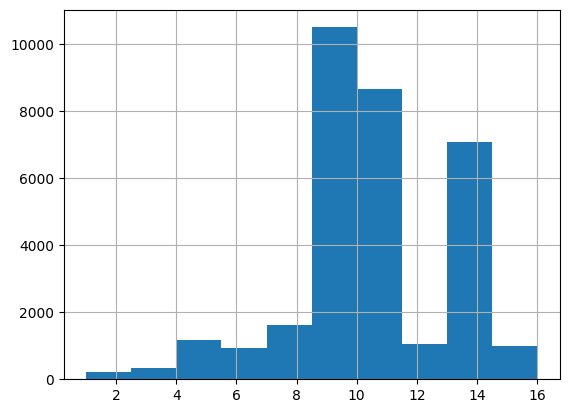

In [68]:
data['education-num'].hist()

In [69]:
print(f"Min value: {data['education-num'].min()}, Max value: {data['education-num'].max()}")

Min value: 1, Max value: 16


**Randomly replace 40% of the first column with NaN values**



In [70]:
data['imp_edu_num'] = data['education-num'].copy()
missing_pct = int(data['imp_edu_num'].size * 0.4)
i = [random.choice(range(data['imp_edu_num'].shape[0])) for _ in range(missing_pct)]
data.loc[i, 'imp_edu_num'] = np.nan
data.info()
data[['imp_edu_num', 'education-num']].head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   32561 non-null  int64  
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
 15  imp_edu_num     21774 non-null  float64
dtypes: float64(1), int64(6), object(9)
memory usage: 4.0+ MB


,imp_edu_num,education-num
0,13.0,13
1,NaN,13
2,9.0,9
3,NaN,7
4,13.0,13
5,14.0,14
6,5.0,5
7,9.0,9
8,14.0,14
9,NaN,13


**When imputing data, use `'imp_edu_num'` column.**




## Mean, median, mode imputation

Use the below functions to complete the missing values:

`int(data.COLUMN_NAME.mode()[0]), int(data.COLUMN_NAME.median()), int(data.COLUMN_NAME.mean())`

Notice: you need to convert the values to int since `'imp_edu_num'` should hold int values

In [71]:
# --------------------------------------------------------------------------WRITE YOUR CODE HERE --------------------------------------------------------------------------

# caluclate the mode, median, mean values to complete with
mode_val = int(data.imp_edu_num.mode()[0])
median_val = int(data.imp_edu_num.median())
mean_val = int(data.imp_edu_num.mean())
print(f'mode: {mode_val}, median: {median_val}, mean: {mean_val} \n')

# impute missing values using the values calculated above
df_mode_imp = data.fillna(value= {'imp_edu_num': mode_val})
df_median_imp = data.fillna(value= {'imp_edu_num': median_val})
df_mean_imp = data.fillna(value= {'imp_edu_num': mean_val})

# print results
pd.DataFrame({'education-num': df_mode_imp['education-num'],
              'mode_imp': df_mode_imp['imp_edu_num'],
              'median_imp':df_median_imp['imp_edu_num'],
              'mean_imp':df_mean_imp['imp_edu_num']})

mode: 9, median: 10, mean: 10 



,education-num,mode_imp,median_imp,mean_imp
0,13,13.0,13.0,13.0
1,13,9.0,10.0,10.0
2,9,9.0,9.0,9.0
3,7,9.0,10.0,10.0
4,13,13.0,13.0,13.0
...,...,...,...,...
32556,12,12.0,12.0,12.0
32557,9,9.0,9.0,9.0
32558,9,9.0,9.0,9.0
32559,9,9.0,9.0,9.0


## Last observation carried forward (LOCF) Imputation

In [72]:
# --------------------------------------------------------------------------WRITE YOUR CODE HERE --------------------------------------------------------------------------

df_ffill = data['imp_edu_num'].fillna(method='ffill')

df_bfill = data['imp_edu_num'].fillna(method='bfill')

# print results
pd.DataFrame({'education-num': data['education-num'],
              'ffill': df_ffill,
              'bfill':df_bfill})

<ipython-input-72-3a350be9382c>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = data['imp_edu_num'].fillna(method='ffill')
<ipython-input-72-3a350be9382c>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = data['imp_edu_num'].fillna(method='bfill')


,education-num,ffill,bfill
0,13,13.0,13.0
1,13,13.0,9.0
2,9,9.0,9.0
3,7,9.0,13.0
4,13,13.0,13.0
...,...,...,...
32556,12,12.0,12.0
32557,9,9.0,9.0
32558,9,9.0,9.0
32559,9,9.0,9.0


## Regression imputation


In [73]:
data.select_dtypes(include=['int64', 'Int64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   fnlwgt          32561 non-null  int64
 2   education-num   32561 non-null  int64
 3   capital-gain    32561 non-null  int64
 4   capital-loss    32561 non-null  int64
 5   hours-per-week  32561 non-null  int64
dtypes: int64(6)
memory usage: 1.5 MB


In [74]:
# Regression imputation for total_bill
## Check correlation among numeric variables:
#corr = data.corr()
data['imp_edu_num'] = data['imp_edu_num'].astype('Int64')
corr = data.select_dtypes(include=['int64', 'Int64']).corr()
corr[['imp_edu_num']].sort_values('imp_edu_num', ascending=False)

,imp_edu_num
education-num,1.000000
imp_edu_num,1.000000
hours-per-week,0.150705
capital-gain,0.119454
capital-loss,0.081530
age,0.042128
fnlwgt,-0.044097


As we can see, `'hours-per-week'` and `'capital-gain'` have the highest correlation to `'imp_edu_num'` .

Thus, we can use a simple linear model regressing `'imp_edu_num'` on `'hours-per-week'` and `'capital-gain'` to fill the missing values in `'imp_edu_num'`.

In [75]:
# --------------------------------------------------------------------------WRITE YOUR CODE HERE --------------------------------------------------------------------------

# create a subset of data where there are no missing values in the 3 above variables:
df_regression = data.dropna(axis= 0, subset= ['hours-per-week', 'capital-gain', 'imp_edu_num'])


# find the entries with 'imp_edu_num' missing:
missing_edu_mask = data.imp_edu_num.isnull()

# extract the 'hours-per-week' and 'capital-gain' of observations with 'imp_edu_num' missing:
hours_capital_miss_edu = data.loc[missing_edu_mask, ['hours-per-week', 'capital-gain']].copy().reset_index(drop=True)

In [76]:
# --------------------------------------------------------------------------WRITE YOUR CODE HERE --------------------------------------------------------------------------

# define X and y
X = df_regression[['hours-per-week', 'capital-gain']]
y = df_regression[['imp_edu_num']]

# Train LinearRegression model:
from sklearn.linear_model import LinearRegression

# init and fit the model on our data
lm = LinearRegression().fit(X, y)

# Use fitted model and the values extracted above to predict missing 'imp_edu_num':
missing_edu_pred = lm.predict(hours_capital_miss_edu)

In [77]:
pd.DataFrame({'missing_edu_pred': missing_edu_pred.reshape(-1).tolist(), 'real_data_education_number': data.loc[missing_edu_mask, ['education-num']].copy().reset_index(drop=True)['education-num'].tolist()})

,missing_edu_pred,real_data_education_number
0,9.206366,13
1,10.010048,7
2,10.201808,13
3,9.712388,13
4,10.010048,11
...,...,...
10782,10.010048,12
10783,10.158878,11
10784,9.146834,14
10785,10.010048,14


## K-nearest neighbour (KNN) imputation

In [38]:
# --------------------------------------------------------------------------WRITE YOUR CODE HERE --------------------------------------------------------------------------

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, weights= 'distance')
# weights = 'distance' means we weight points by the inverse of their distance. closer neighbors -> grater influence.

# Get data rows without nulls (in order to train with no nulls)
df_cc = data.dropna(axis=0)

# Train model
model_3nn = knn.fit(df_cc[['hours-per-week', 'capital-gain']], df_cc[['imp_edu_num']])

# Find missing values in 'imp_edu_num':
missing_size_mask = data.imp_edu_num.isnull()

# Extract the 'hours-per-week', 'capital-gain' for observations with missing imp_edu_num:
df_missing_size = data.loc[missing_size_mask, ['hours-per-week', 'capital-gain']].copy().reset_index(drop=True)

# Predict missing sizes:
prediction_3nn = model_3nn.predict(df_missing_size)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [39]:
pd.DataFrame({'prediction_3nn': prediction_3nn.reshape(-1).tolist(), 'real_data_education_number': data.loc[missing_edu_mask, ['education-num']].copy().reset_index(drop=True)['education-num'].tolist()})

,prediction_3nn,real_data_education_number
0,11.0,9
1,11.0,7
2,9.0,9
3,11.0,13
4,9.0,4
...,...,...
8470,9.0,9
8471,9.0,10
8472,11.0,13
8473,11.0,11


## Compare the Methods

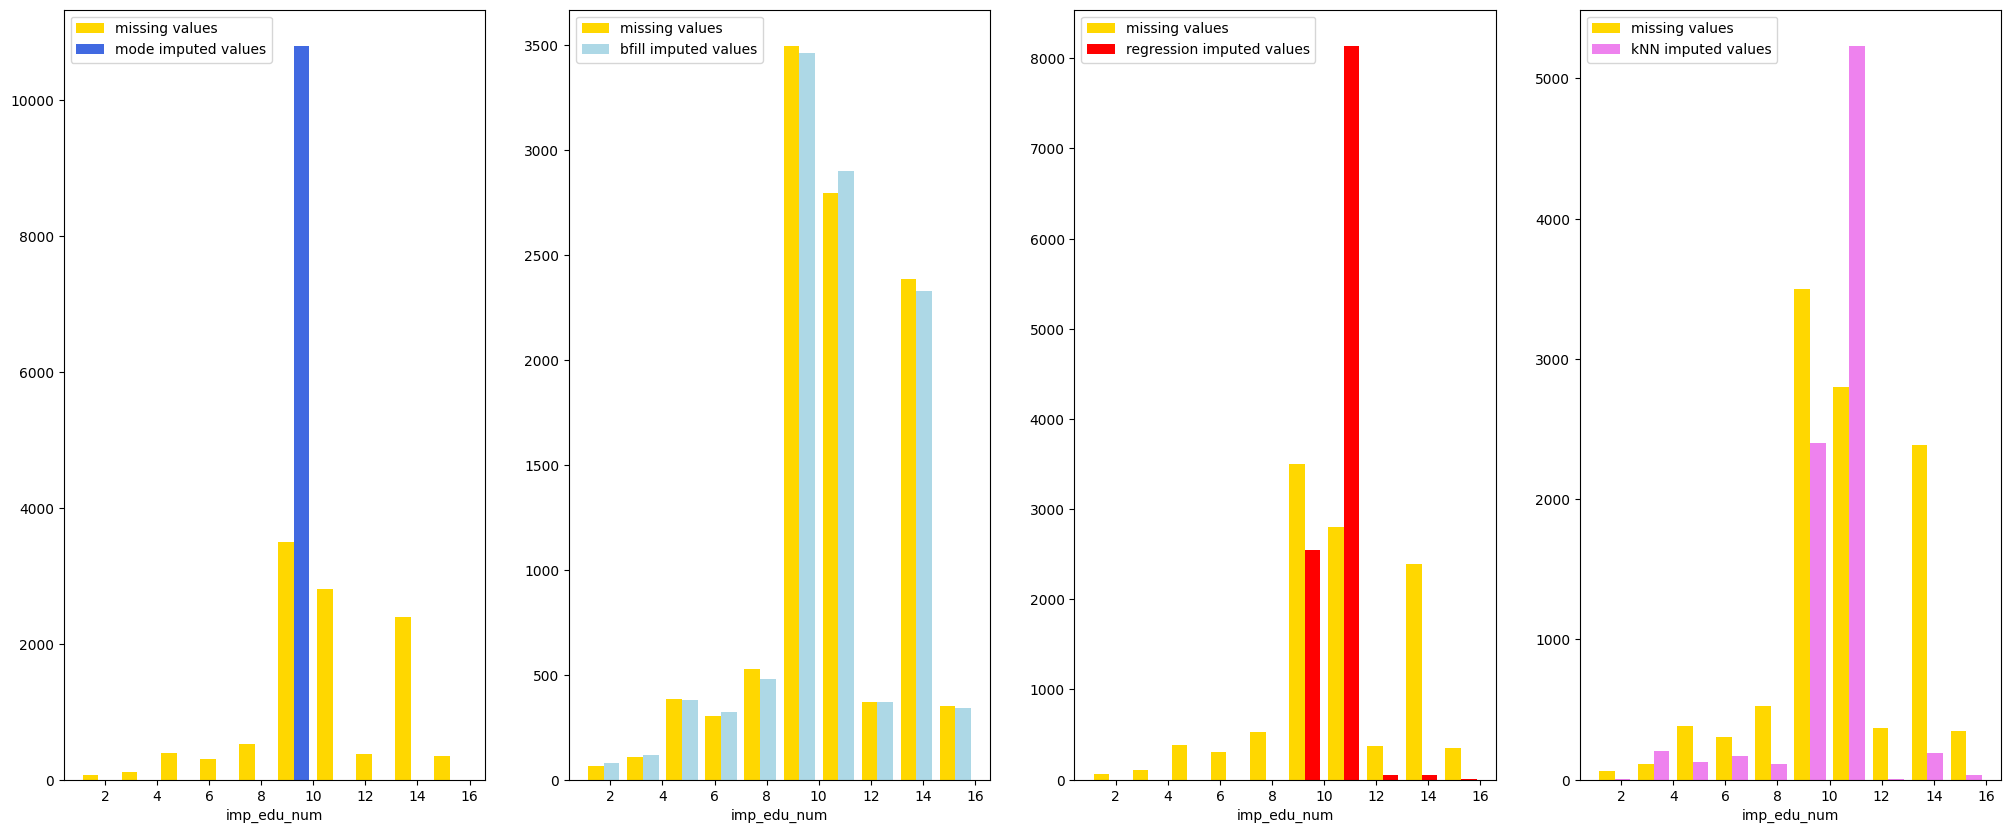

In [83]:
# --------------------------------------------------------------------------WRITE YOUR CODE HERE --------------------------------------------------------------------------

#obs_vals = data.imp_edu_num.dropna(axis=0)
#obs_vals = data.loc[missing_edu_mask, ['education-num']].copy().reset_index(drop=True)['education-num']
mis_vals = data.loc[data['imp_edu_num'].isnull(), 'education-num']
imp_mode = df_mode_imp.loc[data['imp_edu_num'].isnull(), 'imp_edu_num']
imp_bfill = df_bfill[data['imp_edu_num'].isnull()]
imp_reg = pd.Series(missing_edu_pred.reshape(-1))
imp_3nn = pd.Series(prediction_3nn)

plots = [('mode imputed values', imp_mode, 'royalblue'),
        ('bfill imputed values', imp_bfill, 'lightblue'),
        ('regression imputed values', imp_reg, 'red'),
        ('kNN imputed values', imp_3nn, 'violet')]

plt.figure(figsize=(25, 10))

for i, (label, values, color) in enumerate(plots, 1):
    plt.subplot(1, len(plots), i)
    plt.hist([mis_vals, values], color=['gold', color])
    plt.xlabel("imp_edu_num")
    plt.legend(['missing values', label])

plt.show()